<a href="https://colab.research.google.com/github/GalynaDe/ML/blob/main/HW_2_1_%D0%90%D0%BD%D0%B0%D0%BB%D1%96%D0%B7_%D0%BE%D0%B7%D0%BD%D0%B0%D0%BA_%D0%B4%D0%BB%D1%8F_%D0%BF%D0%BE%D0%B1%D1%83%D0%B4%D0%BE%D0%B2%D0%B8_%D0%BB%D1%96%D0%BD%D1%96%D0%B8%CC%86%D0%BD%D0%BE%D1%97_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%96%D1%97.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Завдання 1**: Завантажте дані `medical-charges.csv` в пандас датафрейм і виведіть перші 5 записів. Напишіть, як ви можете підійти до вирішення задачі прогнозування колонки `charges` на основі інших колонок виходячи з наявних на даний момент знань (без ML методів, чисто з використанням аналітики). Запишіть 3 або більше ідей, які приходять вам на думку нижче:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
medical_df = pd.read_csv("drive/MyDrive/ML course 2024/HW 2.1/medical-charges.csv")
medical_df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
unique_ages = medical_df['age'].sort_values().unique()
print(unique_ages)

[18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64]


In [ ]:
def plot_histograms(df):
    # Plot 1: Annual Medical Charges distributed by sex
    fig = px.histogram(medical_df,
                      x='charges',
                      marginal='box',
                      color='sex',
                      color_discrete_sequence=['green', 'grey'],
                      title='Annual Medical Charges distributed by sex')
    fig.update_layout(bargap=0.1)

    # Plot 2: Annual Medical Charges distributed by Region
    fig1 = px.histogram(medical_df,
                       x='charges',
                       marginal='box',
                       color='region',
                       color_discrete_sequence=['green', 'grey', 'red', 'orange'],
                       title='Annual Medical Charges distributed by Region')
    fig1.update_layout(bargap=0.1)

    # Create 'age_group' column
    bins = [18, 29, 40, 51, 65]
    labels = ['18-28', '29-39', '40-50', '51-64']
    medical_df['age_group'] = pd.cut(medical_df['age'], bins=bins, labels=labels)

    # Plot 3: Annual Medical Charges distributed by age
    fig2 = px.histogram(medical_df,
                       x='charges',
                       marginal='box',
                       color='age_group',
                       color_discrete_map={'18-28': 'green', '29-39': 'brown', '40-50': 'red', '51-64': 'blue'},
                       title='Annual Medical Charges distributed by age')
    fig2.update_layout(bargap=0.1)

    # Show all plots
    fig.show()
    fig1.show()
    fig2.show()

In [ ]:
plot_histograms(medical_df)

**Спостереження з першого графіку:**
Для більшості клієнтів річні медичні збори становлять менше $16,000. Менша частина клієнтів має вищі медичні збори, можливо, через нещасні випадки, серйозні хвороби та генетичні захворювання. Розподіл слідує "степеневому закону"
різниці в медичних зборах між жінками та чоловіками майже не спостерігається. Медіана для обох дорівнює $9,4

**Спостереження для другого графіку:**
Спостерігаються найменші виплати в southwest median=8 798, трохи більші у northwest median=8 965, далі southeast 9 294  та найбільші у nourthheast 10 057, але бачимо не значний відрив, можливо пов*язаний з кількіст. населення в регіонах чи з екологічним станом в них.
Для більшості клієнтів річні медичні збори становлять менше $14,000.


**Спостереження для третього графіку:**
Бачимо що найбільщі вилати припадають на старший вік від 51-64, що ціоком закономірно(хронічні хвороби), найменші вилати для 18-28 - молодий вік як правило мало хворіють, мають менші страхові премії також ця категорія взагалі може бути в пошуку работодавця та взагалі не мати страховки.

**Завдання 2**: Візуалізуйте розподіл медичних зборів (`charges`) у вигляді інтерактивної гістограми plotly з розбиттями за категоріями ознак
1. `sex`
2. `region`

Додайте маржинальний графік у вигляді бокс-плота вгорі по дикретним категоріям ознак.
Скористайтесь прикладом візуалізації з лекції.
Опишіть свої спостереження.

In [ ]:
fig = px.histogram(medical_df, x='charges', color='sex', facet_col='region', marginal='box', title='Розподіл медичних зборів за категоріями sex та region')
fig.show()


По всім регіонам більшість виплат як для жінок так і для чоловіків становить менше ніж 15 000, в цілому виплати майже однаково розподілені між ж та ч - медіана по всім регіонам незначно відрізняється для ж та ч.

**Завдання 3**: Візуалізуйте з `plotly` розподіл кожного з настуних стовпців відносно того, чи є людина курцем (`smoker`)
- `region`
- `children`

та опишіть коротко свої спостереження.

In [ ]:
def plot_histograms(df):
    # Первый график
    fig1 = px.histogram(df, x='smoker', color='region', title='Smoker by Region')
    fig1.show()

    # Второй график
    fig2 = px.histogram(df, x='smoker', color='children', title='Smoker by Children')
    fig2.show()
plot_histograms(medical_df)

При порівнянні кількості курців по регіонам, то бачимо перевагу в бік некурців по всім регіонам зі зовсім маленькою різницею по к-ті людей по регіонам.
Курців набагато менше,і якщо порівнювати по регіонам то бачимо, що в sotheast на третину більше ніж по інщим регіонам. Але є треба припустити, що дані можуть бути не дуже точними, за рахунок неправдивих відповідей опитуваних.
При порівнянні к-ті курців в залежності від к-ті дітей, то видно, що курців менше серед тих хто має дітей і можна припустити, що наявність дітей може бути фактором який сприяє некурінню, але так як взагалі серед опитанних курців менше то складно припустити на скільки наявність дітей стримує від куріння.

**Завдання 4**: Візуалізуйте звʼязок між стовпцем `charges` та `children` використовуючи графіки-скрипки (`px.violin`). Опишіть свої спостереження.

In [ ]:
fig = px.violin(medical_df, x='children', y='charges', box=True, points='all', title='Розподіл медичних зборів за кількістю дітей')
fig.show()


**Завдання 5.** Розглянемо модель для користувачів, які не є курцями (`no_smoker_df`):

$$charges = w \times age + b$$

Спробуйте 3 різні пари параметрів `w` та `b` аби вручну підігнати лінію під дані використовуючи наведені допоміжні функції `estimate_charges` та `try_parameters`. Опишіть спостереження.
Пари параметрів мають бути НЕ такі, як були наведені в лекції.

In [ ]:
non_smoker_df = medical_df[medical_df.smoker == 'no']

In [ ]:
def estimate_charges(age, w, b):
    return w * age + b

In [ ]:
def try_parameters(df, w, b):
    ages = df.age
    target = df.charges

    estimated_charges = estimate_charges(ages, w, b)

    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);

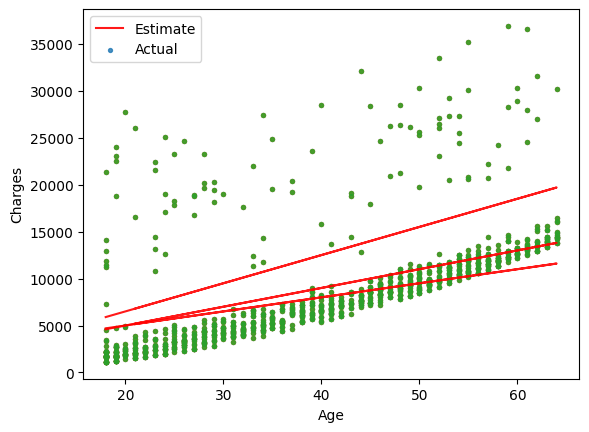

In [ ]:
import matplotlib.pyplot as plt
parameters = [ (200, 1000),
              (300, 500),
               (150, 2000) ]
for w, b in parameters: try_parameters(non_smoker_df, w, b)

Спостереження:

Параметри (200, 1000): Лінія оцінки має крутий нахил і перетинає вісь charges на рівні 1000. Ця пара параметрів може бути занадто крутою для даних, що призводить до переоцінки медичних зборів для молодших вікових груп.

Параметри (300, 500): Лінія оцінки має ще крутіший нахил і перетинає вісь charges на рівні 500. Ця пара параметрів також може бути занадто крутою, що призводить до значної переоцінки медичних зборів для молодших вікових груп.

Параметри (150, 2000): Лінія оцінки має менш крутий нахил і перетинає вісь charges на рівні 2000. Ця пара параметрів може бути більш підходящою, оскільки вона краще відповідає розподілу даних, але все ще може бути дещо завищеною для старших вікових груп.

**Завдання 6**: Напишіть фукнцію для обчислення root mean squared error згідно з формулою цієї метрики точності моделі з використанням `numpy`.

Обчисліть RMSE для тих пар пареметрів, які Ви спробували в завданні 5.

Яке найнижче значення втрат ви зможете досягти? Чи можете ви придумати загальну стратегію для знаходження кращих значень $w$ та $b$ методом проб та помилок?

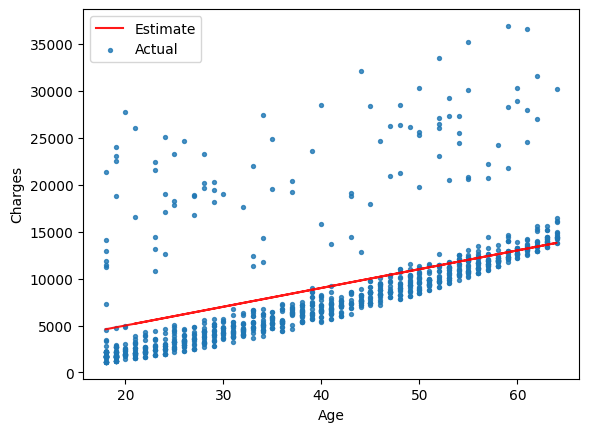

RMSE для параметрів (w=200, b=1000): 4778.197917926803


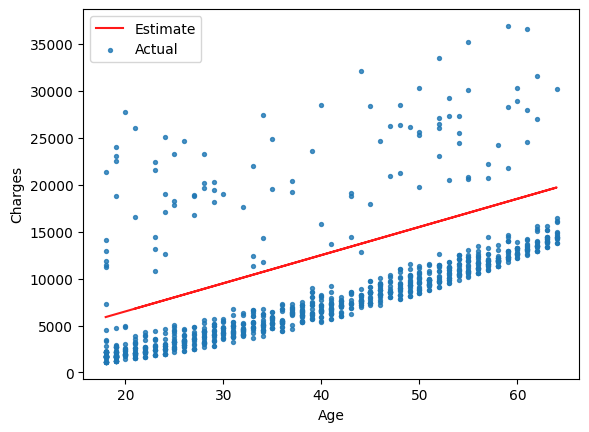

RMSE для параметрів (w=300, b=500): 6084.0986441911855


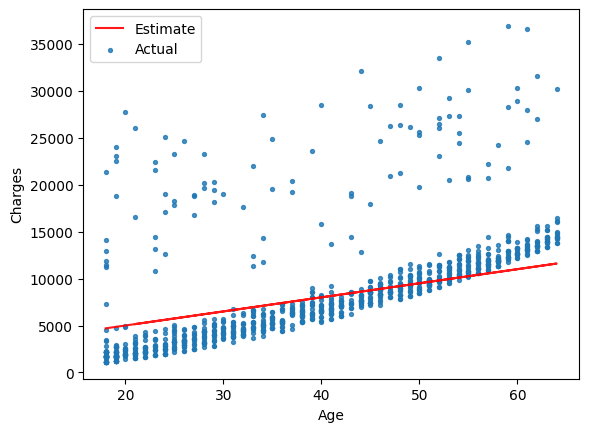

RMSE для параметрів (w=150, b=2000): 4973.95616488608


In [ ]:
import numpy as np
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))
non_smoker_df = medical_df[medical_df.smoker == 'no']

def estimate_charges(age, w, b):
    return w * age + b

def try_parameters(df, w, b):
    ages = df.age
    target = df.charges

    estimated_charges = estimate_charges(ages, w, b)

    plt.plot(ages, estimated_charges, 'r', alpha=0.9)
    plt.scatter(ages, target, s=8, alpha=0.8)
    plt.xlabel('Age')
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual'])
    plt.show()

    return rmse(target, estimated_charges)

# Параметри для спроби
parameters = [
    (200, 1000),
    (300, 500),
    (150, 2000)
]

# Обчислення RMSE для кожної пари параметрів
for w, b in parameters:
    error = try_parameters(non_smoker_df, w, b)
    print(f"RMSE для параметрів (w={w}, b={b}): {error}")


**Спостереження:**

Параметри (200, 1000): RMSE для цієї пари параметрів може бути досить високим, оскільки лінія оцінки має крутий нахил і може переоцінювати медичні збори для молодших вікових груп.

Параметри (300, 500): RMSE для цієї пари параметрів також може бути високим через ще крутіший нахил лінії оцінки.

Параметри (150, 2000): RMSE для цієї пари параметрів може бути нижчим, оскільки лінія оцінки краще відповідає розподілу даних.

**Загальна стратегія для знаходження кращих значень w та b методом проб та помилок:**

1. Початкові оцінки для w та b

2. Аналіз результатів:

Обчислення RMSE для кожної пари параметрів та аналіз результатів.

3. Адаптація параметрів:

Змінюючи w та b на основі аналізу результатів пробуємо підібрати такі, при яких RMSE буде оптимальним.

4. Повторення:

Повторення процесу, поки не знайдеться та пара параметрів, яка мінімізує RMSE.